# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Seventeen (17) marketing campaigns are represented by this data

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [21]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### Missing values
By a quick scan of the describe(s), it appears there are no missing values. The below analysis will confirm.

In [6]:
missing = pd.DataFrame(bank.isnull().sum()).reset_index()
column_names = ['column name', 'missing count']
missing.columns = column_names
missing = missing[missing['missing count'] != 0]
missing['% of total rows'] = missing['missing count'] / bank.shape[0]
missing

,column name,missing count,% of total rows


Zero rows means there are no missing values. That said, the possible values for some of the categorical variables listed in the data dictionary are debately equivalent to a "missing" value, in that they don't give any tangible information.

These are:
 - job: unknown
 - marital: unknown
 - education: unknown
 - default: unknown
 - housing: unknown
 - loan: unknown
 
 Poutcome does not fit this description, because "nonexistent" is not the same as "unknown"--it means that the client was not a target of a campaign before.
 
 For these six identified attributes, they should be imputed or dropped.
 
 First, identify the frequency.

In [7]:
unknown_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# temporary dataframe to track and display the counts
unknown_counts = pd.DataFrame(columns=['Column', 'Values', 'Counts'])

# loop and count
for column in unknown_columns:
    counts = bank[column].value_counts()
    unknown_counts = pd.concat([unknown_counts, pd.DataFrame({'Column': [column] * len(counts.index),
                                                              'Values': counts.index,
                                                              'Counts': counts.values})], ignore_index=True)
    
unknown_counts.query("Values == 'unknown'")

,Column,Values,Counts
11,job,unknown,330
15,marital,unknown,80
22,education,unknown,1731
25,default,unknown,8597
29,housing,unknown,990
32,loan,unknown,990


Default has the most unknowns, and marital has the least. No column has too many unknowns--we can safely drop them and still have enough data for our models.

In [10]:
# check value counts before and after for validation
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
mask_unknown_education = (bank['education'] == 'unknown')

# drop rows with "unknown" in at least one column
bank = bank[~mask_unknown_education]

for column in unknown_columns:
    unknown_mask = (bank['education'] == 'unknown')
    bank = bank[~unknown_mask]

In [12]:
# check value counts before and after for validation
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

#### Duplicates

In [16]:
# identify duplicates
duplicates = bank[bank.duplicated()]
print(f'Size of dataset: {bank.shape[0]}')
print(f'Count of dupes: {duplicates.shape[0]}')

# drop duplicates
bank.drop_duplicates(inplace=True)
print(f'Size after dropping dupes: {bank.shape[0]}')

Size of dataset: 39457
Count of dupes: 11
Size after dropping dupes: 39446


Found and dropped 11 duplicates.

#### Special Case: Duration
The data definition suggests that duration should be dropped from the dataset because a 0 value is completely predictive of a "no".

In [17]:
bank.drop(['duration'], axis=1, inplace=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Outliers

Recalling numeric columns.

In [19]:
bank.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39446.000000,39446.000000,39446.000000,39446.000000,39446.000000,39446.000000,39446.000000,39446.000000,39446.000000
mean,39.871977,2.566597,963.327334,0.170664,0.082956,93.572091,-40.530348,3.623530,5167.364896
std,10.293967,2.772420,184.806340,0.488402,1.567300,0.577238,4.622978,1.730839,71.804348
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the above, as well as the data definition provided, there are four numeric columns we want to explore:
 - age
 - campaign
 - pdays
 - previous

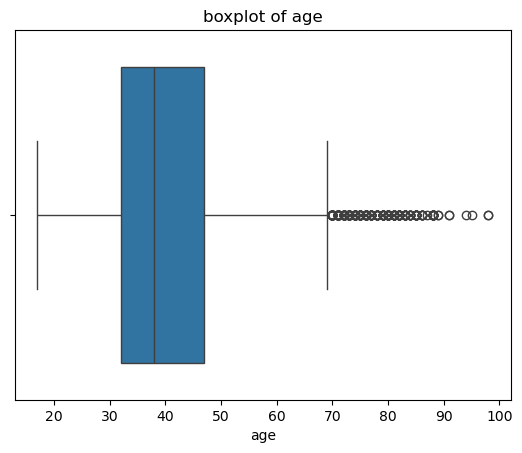

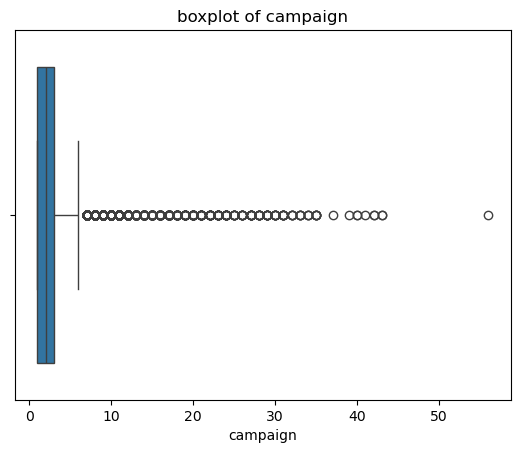

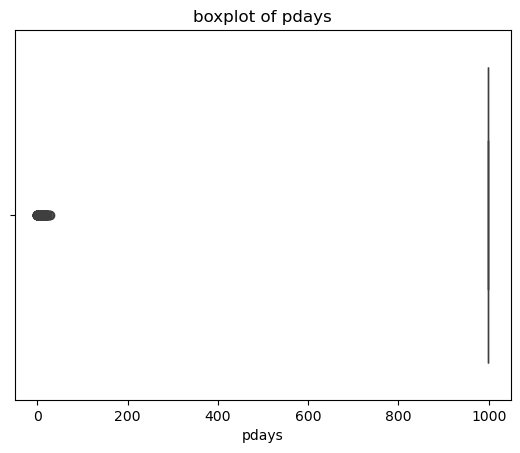

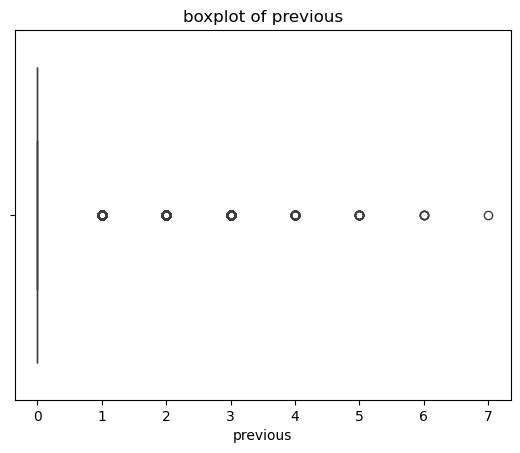

In [22]:
num_columns = ['age', 'campaign','pdays','previous']

for column in num_columns:
    sns.boxplot(x=bank[column])
    plt.title(f'boxplot of {column}')
    plt.show()

The boxplots, combined with the description above, show that we have some outliers to address within the data, in order to make it usable for modeling.

The most strikng numeric attribute is the max value of pdays--it shows 999. The data definition suggests this value means that the client was not previously contacted.

If 999 makes up a large percentage of the records in our dataset, then we will need engineer a new feature by making this column a binary. If it's a small dataset, we can drop these records or input it in some other fashion.

In [24]:
pd.DataFrame(bank['pdays'].value_counts(normalize=True)).sort_values(by=['pdays'])

,pdays
27,0.000025
25,0.000025
26,0.000025
21,0.000051
19,0.000076
22,0.000076
18,0.000127
17,0.000152
16,0.000228
0,0.000380


~96% of the records in this dataset are 999 for pdays, so we can make it a binary value of contacted (pdays=1) or never contacted (pdays=2).

In [25]:
# check whether pdays is 999, using a bool comparison, then convert to int
bank['contacted'] = (bank['pdays'] != 999).astype(int)
bank.drop(['pdays'], axis=1, inplace=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39457 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39457 non-null  int64  
 1   job             39457 non-null  object 
 2   marital         39457 non-null  object 
 3   education       39457 non-null  object 
 4   default         39457 non-null  object 
 5   housing         39457 non-null  object 
 6   loan            39457 non-null  object 
 7   contact         39457 non-null  object 
 8   month           39457 non-null  object 
 9   day_of_week     39457 non-null  object 
 10  duration        39457 non-null  int64  
 11  campaign        39457 non-null  int64  
 12  pdays           39457 non-null  int64  
 13  previous        39457 non-null  int64  
 14  poutcome        39457 non-null  object 
 15  emp.var.rate    39457 non-null  float64
 16  cons.price.idx  39457 non-null  float64
 17  cons.conf.idx   39457 non-null 

In [27]:
pd.DataFrame(bank['y'].value_counts(normalize=True))


,y
no,0.888759
yes,0.111241


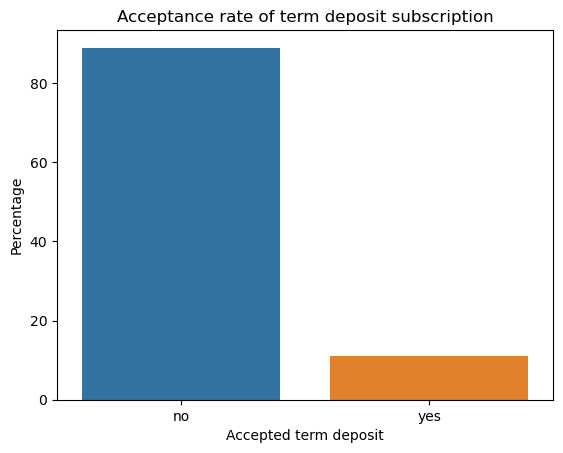

In [31]:
plt.title("Acceptance rate of term deposit subscription")
sns.countplot(data=bank, x='y', hue='y', stat='percent')
plt.ylabel("Percentage")
plt.xlabel("Accepted term deposit")
plt.show()

#### Business Objective
Individuals have become numb to the bombardment of marketing campaigns. The above analysis gives some context for our particular situation: Only 11% of individuals in the marketing dataset accept the term deposit offer.

The objective of our analys is to create a model that can predict which clients accept the deposit, so that we know we are investing marketing funds in targeting the correct clients, and therefore receiving a better ROI on our marketing spend.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions